## Imports

In [46]:
import os, sys, os.path as osp
sys.path += ["../src/", "../src/pytorch_utils/"]


In [47]:
import torch
from dataset import get_dataloaders
from pytorch_utils import *
from models import emnist_net
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm

## Data

In [49]:
# data
train_loader, test_loader = get_dataloaders(test_randomize=True)

## Model

In [50]:
# model
model = emnist_net.EMNISTNet(len(train_loader.dataset.classes))
model.cuda()

EMNISTNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=47, bias=True)
)

In [51]:
checkpoint_path = './checkpoints/emnist_02Mar2020.004638_epoch19.tar'
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])

<All keys matched successfully>

## Test images

In [52]:
test_iter = test_loader.__iter__()
classes = test_loader.dataset.classes

expected label:  1-small
predicted label:  1-small


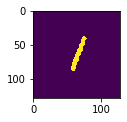

In [74]:
data = test_iter.next()
img, label = data[0][0], data[1][0]

# show the image and label
current_image = img
show_image(current_image[0].numpy())
print("expected label: ", classes[label.item()])

# predict thru model and display the result
current_image = current_image.cuda()
out = model(current_image.unsqueeze(dim=0))
actual = out.argmax(dim=-1)
print("predicted label: ", classes[actual.item()])